# Predicting sale prices of Bulldozer 🚜 (2013 Kaggle competition) 
                                                      
                                                                                          -Vaibhav Haswani

Problem statement:
*Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.*

link to problem:https://www.kaggle.com/c/bluebook-for-bulldozers/overview

**Data is downloaded from above link**

#### Data description:
The data for this competition is split into three parts:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:
* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

#### Evaluation / Goal:

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note:**`Goal is to minimize the given metric based error`

## Features Description
the feature discription is provided as data dictionary with our data

In [1]:
!pip install xlrd
from pandas import read_excel
data_dict=read_excel('data/Data Dictionary.xlsx')
data_dict.drop('Unnamed: 2',axis=1)

,Variable,Description
0,SalesID,unique identifier of a particular sale of a ...
1,MachineID,identifier for a particular machine; machin...
2,ModelID,identifier for a unique machine model (i.e. ...
3,datasource,source of the sale record; some sources are...
4,auctioneerID,"identifier of a particular auctioneer, i.e. ..."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...
7,UsageBand,"value (low, medium, high) calculated compari..."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


### Imports

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as skl;

In [8]:
df=pd.read_csv('data/TrainAndValid.csv',low_memory=False,parse_dates=['saledate']) #parsing date to datetime obj is an important step to interact with datetime stamps, i'had to follow this step because i faced some issues when plotting with regular datetime column
df.head()#.T #if data truncated

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's dive into data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [18]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

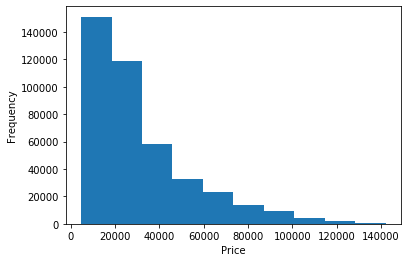

In [19]:
#checking sales data
plt.hist(df.SalePrice) #left skewed dist
plt.xlabel('Price')
plt.ylabel('Frequency');

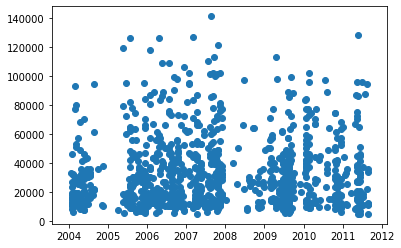

In [20]:
# Checking dependency on dates
plt.scatter(df.saledate[:1000],df.SalePrice[:1000]);

In [21]:
#Sorting data according to dates

df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

**Making a copy of our data incase any manipulation goes wrong**

In [22]:
df_tmp=df.copy()

In [23]:
#checking copy
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Some Feature engineering

In [24]:
# some feature engineering based on sale date
df['saleYear']=df.saledate.dt.year
df['saleMonth']=df.saledate.dt.month
df['saleDay']=df.saledate.dt.day
df['yearDay']=df.saledate.dt.dayofyear

In [25]:
df.drop("saledate",inplace=True,axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Transformation to numerical data

should be converted into categories first

checking the type from type api:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_object_dtype.html

In [27]:
#Checking which column is String object type

cols=df.columns
str_cols=[]
for i in cols:
    if pd.api.types.is_string_dtype(df[i]):
        str_cols.append(i)
str_cols

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [28]:
#Transforming these columns into categorical object (ordered)
for fea in str_cols:
    df[fea]=df[fea].astype("category").cat.as_ordered()


In [29]:
df.info() # underneath the hood the category object has a numerical value assigned with every distinct value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [30]:
#demonstration for cat codes
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [31]:
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Filling missing data

In [32]:
#checking % of missing vales

df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

**Filling numerical values**

median is more robust to mean for Imputation since mean is sensitive to outliers

In [33]:
#Listing all numerical columns with null values and filling with median

num_col=[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and pd.isnull(df[col]).sum(): 
        num_col.append(col)
        df[col].fillna(df[col].median(),inplace=True)
num_col    

['auctioneerID', 'MachineHoursCurrentMeter']

In [34]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

**Filling non numeric values categorical values**

In [35]:
#using our str col list to fill those categorical columns
#Since categories object assign -1 code to null values if we increment them  by 1 they will be no null and 0 code will indicate missing

for col in str_cols:
    if pd.api.types.is_string_dtype(df[col]):
        df[col]=df[col].cat.codes + 1 #we'll assign codes to new data set

In [36]:
df.isna().sum() #mission accomplished

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

# Model fitting

In [97]:
%%time
from sklearn.ensemble import RandomForestRegressor

#Splitting data since ,val set > year 2012
df_val=df[df['saleYear']>2011]
df_train=df[df['saleYear']<=2011]

X_val,y_val=df_val.drop('SalePrice',axis=1),df_val['SalePrice']
X_train,y_train=df_train.drop('SalePrice',axis=1),df_train['SalePrice']

model=RandomForestRegressor(n_jobs=-1,random_state=10)

model.fit(X_train,y_train)

Wall time: 4min 18s


RandomForestRegressor(n_jobs=-1, random_state=10)

In [98]:
model.score(X_val,y_val) #default metrics on val set

0.8725378132849158

**Evaluation functions**

In [99]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,mean_squared_error,r2_score

#demanded eval metric
def rmsle(ytrue,ypred):
    return np.sqrt(mean_squared_log_error(ytrue,ypred))
def scores(model,X,ytrue):
    y_pred=model.predict(X)
    
    print(f"Mean Absolute,\t{mean_absolute_error(ytrue,y_pred)}")
    print(f"Mean Squared,\t{mean_squared_error(ytrue,y_pred)}")
    print(f"Root Mean Squared Log,\t{np.sqrt(mean_squared_log_error(ytrue,y_pred))}")
    print(f"R2 Score,\t{r2_score(ytrue,y_pred)}")

In [100]:
#evaluating RMSLE
y_pred=model.predict(X_val)
rmsle(y_val,y_pred)

0.25408901925237837

In [101]:
scores(model,X_val,y_val)

Mean Absolute,	6108.424782683832
Mean Squared,	87550259.87852292
Root Mean Squared Log,	0.25408901925237837
R2 Score,	0.8725378132849158


## Tuning HyperParameters

In [42]:
'''model=RandomForestRegressor(n_jobs=-1,
                           random_state=10,
                        max_samples=10000) #Set Samples to increase Estimators'''

In [43]:
'''%%time
model.fit(X_train,y_train)'''

Wall time: 10.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=10)

In [44]:
'''scores(model,X_val,y_val)'''

Mean Absolute,	7153.699554998704
Mean Squared,	113840871.98512271
Root Mean Squared Log,	0.29332099821418567
R2 Score,	0.8342619827638538


**Note** : the above mentioned tuning is only necessary when time is the major factor i'll be skipping this model because metric is the main concern to me, and will use it for Searching HyperParameter

In [120]:
%%time
# Using Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

rs_grid={'bootstrap': [True, False],  # our random grid to select best param among them
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt',0.5],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10,15],
 'n_estimators': [50,80,100,200, 1000],
        'max_samples':[10000,None]} # for fast selection

#creating model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=10),
                            param_distributions=rs_grid,
                            n_jobs=-1,
                           n_iter=50,
                           cv=4,
                           verbose=True)


rs_model.fit(X_train,y_train)
rs_model.best_params

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


UnboundLocalError: local variable 'pid' referenced before assignment

In [114]:
%%time
from sklearn.ensemble import RandomForestRegressor
#By running the above for 3 hrs we got a bunch of HPs
model=RandomForestRegressor(n_jobs=-1,
                           random_state=10,
                            n_estimators=200,
                            min_samples_leaf=1,
                            min_samples_split=15,
                            max_features=0.5,
                            max_samples=None
                           )
model.fit(X_train,y_train)

Wall time: 4min 1s


RandomForestRegressor(max_features=0.5, min_samples_split=15, n_estimators=200,
                      n_jobs=-1, random_state=10)

In [115]:
scores(model,X_val,y_val)

Mean Absolute,	5891.298944915826
Mean Squared,	79706911.25529748
Root Mean Squared Log,	0.2434588648301018
R2 Score,	0.8839567441718394


In [116]:
y_preds=model.predict(X_val)
rmsle(y_val,y_preds)

0.2434588648301018

**Generating Important features decided by out model**

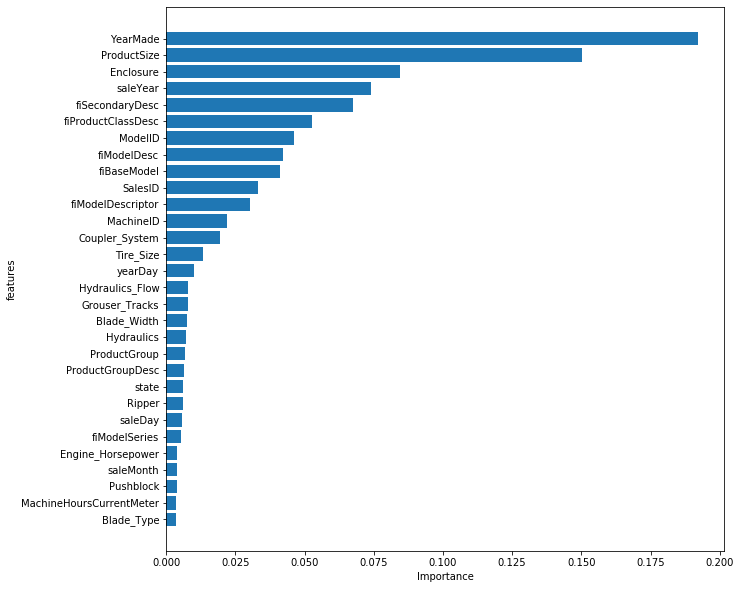

In [44]:
imp_fea=model.feature_importances_
indexes=X_train.columns
feat_df=(pd.DataFrame({"features":indexes,"feature importance":imp_fea}).sort_values("feature importance",ascending=False)).reset_index(drop=True)
fig,axes=plt.subplots(figsize=(10,10))
axes.barh(feat_df["features"][:30],feat_df["feature importance"][:30])
axes.set_xlabel("Importance")
axes.set_ylabel("features")
axes.invert_yaxis()

**Goal**: we have achived a metric score among top 25 team i.e our Score: **0.2434588648301018** on *RMSLE*

Check LeaderBords from:https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard

## Preprocessing Test data

In [83]:
df_test=pd.read_csv('data/Test.csv',low_memory=False,parse_dates=['saledate'])

In [88]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,yearDay
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,2012,5,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,Standard,Conventional,2012,5,10,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,Double,NaN,NaN,NaN,NaN,NaN,2012,5,10,131
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,Triple,NaN,NaN,NaN,NaN,NaN,2012,5,10,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,298
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,298
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,298
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,298


In [89]:
#Function to clean and process our data'

def test_preprocess(dft):
    #feature Eng part
    dft['saleYear']=dft.saledate.dt.year
    dft['saleMonth']=dft.saledate.dt.month
    dft['saleDay']=dft.saledate.dt.day
    dft['yearDay']=dft.saledate.dt.dayofyear
    dft.drop("saledate",inplace=True,axis=1) 
    #transforming str data
    for fea in str_cols:
        dft[fea]=dft[fea].astype("category").cat.as_ordered()
    for col in str_cols:
        if pd.api.types.is_string_dtype(dft[col]):
            dft[col]=dft[col].cat.codes + 1
    #transforming numeric data
    for col in dft.columns:
        if pd.api.types.is_numeric_dtype(dft[col]) and pd.isnull(dft[col]).sum(): 
            dft[col].fillna(dft[col].median(),inplace=True)
    return dft
    

In [90]:
test=test_preprocess(df_test)

In [91]:
test.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [117]:
final_predictions=model.predict(test)

In [118]:
final_predictions

array([17555.32821692, 16784.6133404 , 48340.12206571, ...,
       14304.46361238, 17910.27841763, 26996.62603529])

SO, The required format of submission is given at: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Target is to format and save our model with prediction data as per given format**

## Saving Everything

In [125]:
#Saving Predictions
pred_df=pd.DataFrame({"SalesID":test['SalesID'],"SalePrice":final_predictions})
pred_df

,SalesID,SalePrice
0,1227829,17555.328217
1,1227844,16784.613340
2,1227847,48340.122066
3,1227848,64366.017511
4,1227863,57501.241199
...,...,...
12452,6643171,41866.680098
12453,6643173,14318.434843
12454,6643184,14304.463612
12455,6643186,17910.278418


In [122]:
pred_df.to_csv('data/Predictions.csv')

In [124]:
#Saving Model
import pickle
pickle.dump(model,open('model/final_model.pkl','wb'))